### Questions to Ask

1. What is, on average, the amount of salary that produces one fantasy point?

2. How many fantasy points does each position produce?

3. How does number of fantasy points per game trend over time?

4. What is the spread of fantasy points a player scores in a game? What about the spread of salary required to use that player?

5. What is the correlation between player fantasy points and player salary?

In [1]:
# import statements and show all columns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 80)

In [2]:
# import data
dfs = pd.read_csv('CleanCombinedDFSAll.csv',index_col=0)

/Users/gauravkumar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# some extra data cleaning & display data
dfs = dfs[(dfs.Team != 'EAST') & (dfs.Team != 'WEST')]
dfs

,Player,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,DoubleDoubles,DraftKingsPosition,DraftKingsSalary,FantasyPointsDraftKings,GameID,HomeOrAway,InjuryBodyPart,InjuryNotes,InjuryStartDate,InjuryStatus,Opponent,OpponentPositionRank,OpponentRank,Position,Season,Started,Team,TripleDoubles,Date,Time
0,Kristaps Porzingis,32:48,5.0,13.0,0.385,3.0,5.0,0.600,3.0,6.0,0.500,4.0,3.0,7.0,0.0,1.0,2.0,2.0,5.0,16.0,-21.0,0.512,0.500,0.385,0.462,11.0,11.0,11.0,0.0,1.5,5.0,11.3,22.7,100.0,116.0,0.0,PF,8339.0,37.0,9642.0,AWAY,Scrambled,Scrambled,NaN,Scrambled,CLE,21.0,11.0,PF,2017.0,0.0,NY,0.0,2016-10-25,19:30:00
1,Carmelo Anthony,30:05,8.0,18.0,0.444,1.0,4.0,0.250,2.0,2.0,1.000,1.0,4.0,5.0,3.0,1.0,0.0,4.0,5.0,19.0,-19.0,0.503,0.472,0.222,0.111,3.0,16.0,8.6,24.9,1.6,0.0,17.5,32.1,90.0,117.0,0.0,SF,8565.0,40.1,9642.0,AWAY,Scrambled,Scrambled,NaN,Scrambled,CLE,6.0,11.0,SF,2017.0,0.0,NY,0.0,2016-10-25,19:30:00
2,Derrick Rose,29:35,7.0,17.0,0.412,1.0,2.0,0.500,2.0,2.0,1.000,2.0,1.0,3.0,1.0,0.0,1.0,4.0,1.0,17.0,-19.0,0.475,0.441,0.118,0.118,6.1,4.1,5.2,7.9,0.0,2.8,18.3,31.2,83.0,123.0,0.0,PG,6536.0,33.0,9642.0,AWAY,Scrambled,Scrambled,NaN,Scrambled,CLE,27.0,11.0,PG,2017.0,0.0,NY,0.0,2016-10-25,19:30:00
3,Courtney Lee,19:37,0.0,5.0,0.000,0.0,2.0,0.000,0.0,0.0,0.000,1.0,2.0,3.0,0.0,0.0,1.0,2.0,1.0,0.0,-19.0,0.000,0.000,0.400,0.000,4.6,12.2,7.9,0.0,0.0,4.1,28.6,15.1,8.0,120.0,0.0,SG,4169.0,20.7,9642.0,AWAY,Scrambled,Scrambled,NaN,Scrambled,CLE,18.0,11.0,SG,2017.0,0.0,NY,0.0,2016-10-25,19:30:00
4,Joakim Noah,19:31,0.0,1.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,5.0,6.0,3.0,1.0,0.0,1.0,1.0,0.0,-1.0,0.000,0.000,0.000,0.000,4.6,30.7,15.9,23.1,2.5,0.0,50.0,4.3,72.0,112.0,0.0,C,6198.0,27.6,9642.0,AWAY,Scrambled,Scrambled,NaN,Scrambled,CLE,20.0,11.0,C,2017.0,0.0,NY,0.0,2016-10-25,19:30:00
5,Justin Holiday,26:27,2.0,7.0,0.286,2.0,3.0,0.667,2.0,2.0,1.000,1.0,5.0,6.0,2.0,1.0,0.0,0.0,0.0,8.0,-14.0,0.508,0.429,0.429,0.286,3.4,22.7,11.7,12.8,1.8,0.0,0.0,12.6,122.0,116.0,0.0,SG/SF,3381.0,13.2,9642.0,AWAY,Scrambled,Scrambled,NaN,Scrambled,CLE,18.0,11.0,SG,2017.0,0.0,NY,0.0,2016-10-25,19:30:00
6,Brandon Jennings,21:14,1.0,7.0,0.143,0.0,4.0,0.000,5.0,6.0,0.833,1.0,2.0,3.0,5.0,0.0,0.0,1.0,2.0,7.0,-14.0,0.363,0.143,0.571,0.857,4.3,11.3,7.3,38.0,0.0,0.0,9.4,21.1,95.0,122.0,0.0,PG,5071.0,26.4,9642.0,AWAY,Scrambled,Scrambled,NaN,Scrambled,CLE,27.0,11.0,PG,2017.0,0.0,NY,0.0,2016-10-25,19:30:00
7,Lance Thomas,16:37,1.0,4.0,0.250,0.0,0.0,0.000,0.0,0.0,0.000,0.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,2.0,-11.0,0.250,0.250,0.000,0.000,0.0,7.2,3.1,9.9,5.8,0.0,20.0,12.7,51.0,111.0,0.0,SF/PF,3493.0,13.3,9642.0,AWAY,Scrambled,Scrambled,NaN,Scrambled,CLE,6.0,11.0,SF,2017.0,0.0,NY,0.0,2016-10-25,19:30:00
8,Kyle O'Quinn,15:24,1.0,3.0,0.333,0.0,2.0,0.000,0.0,0.0,0.000,1.0,4.0,5.0,1.0,0.0,2.0,1.0,3.0,2.0,-10.0,0.333,0.333,0.667,0.000,5.9,31.2,16.8,10.8,0.0,10.6,25.0,11.0,70.0,110.0,0.0,PF/C,3606.0,11.3,9642.0,AWAY,Scrambled,Scrambled,NaN,Scrambled,CLE,21.0,11.0,PF,2017.0,0.0,NY,0.0,2016-10-25,19:30:00
9,Willy Hernangomez,9:26,2.0,3.0,0.667,0.0,0.0,0.000,0.0,0.0,0.000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,-3.0,0.667,0.667,0.000,0.000,9.6,0.0,5.5,0.0,0.0,0.0,25.0,17.9,98.0,125.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,2016-10-25,NaN


In [4]:
##question 1
np.sum(dfs.DraftKingsSalary)/np.sum(dfs.FantasyPointsDraftKings)

317.62935453577995

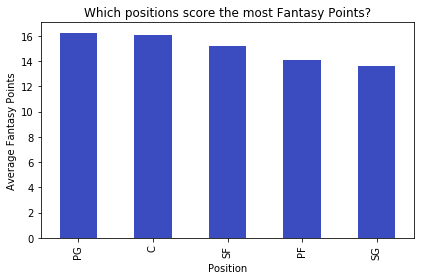

In [16]:
##question 2
# calculate average fantasy points by position
pos_fpts = dfs.groupby('Position')['FantasyPointsDraftKings'].agg(['count','sum'])
pos_fpts['avg_fpts'] = pos_fpts['sum']/pos_fpts['count']
pos_fpts = pos_fpts[(pos_fpts.index != 'G') & (pos_fpts.index != 'F')].sort_values(by='avg_fpts',ascending=False)
# plot average fantasy points by position
plot = pos_fpts.avg_fpts.plot(kind='bar',colormap='coolwarm',title = 'Which positions score the most Fantasy Points?')
plt.xlabel('Position')
plt.ylabel('Average Fantasy Points')
plt.tight_layout()
plt.show()
# save plot to file
plot.get_figure().savefig('question2')

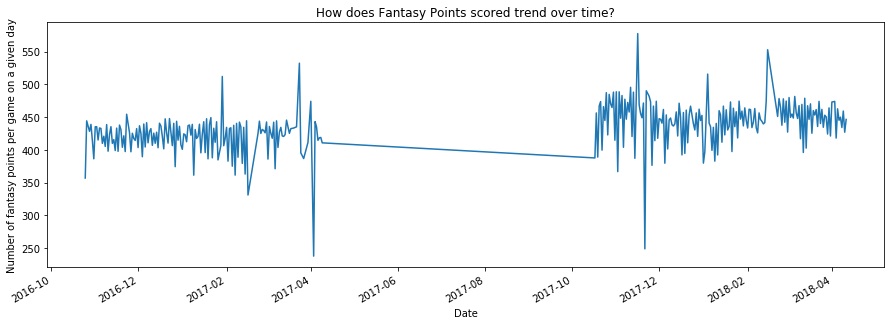

In [26]:
##question 3
# calculate amount of fantasy points scored per game per day
game_fpts = dfs.groupby('Date')['FantasyPointsDraftKings','GameID'].agg({'FantasyPointsDraftKings':'sum','GameID':'nunique'})
game_fpts = game_fpts[game_fpts.FantasyPointsDraftKings != 0]
game_fpts['points_per_day'] = game_fpts.FantasyPointsDraftKings/game_fpts.GameID
game_fpts.index = pd.to_datetime(game_fpts.index)
# plot amount of fantasy points scored per game per day
fig, ax = plt.subplots()
plot = pd.Series(game_fpts.points_per_day).plot(figsize=(15,5),legend=False,title = 'How does Fantasy Points scored trend over time?',ax=ax)
plt.ylabel('Number of fantasy points per game on a given day')
# save plot to file
plot.get_figure().savefig('question3')

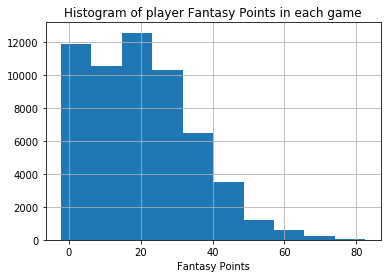

In [28]:
##question 4
# plot histogram of fantasy points
plot = dfs[dfs.FantasyPointsDraftKings != 0].FantasyPointsDraftKings.hist()
plt.title('Histogram of player Fantasy Points in each game')
plt.xlabel('Fantasy Points')
# save plot to file
plot.get_figure().savefig('question4p1')

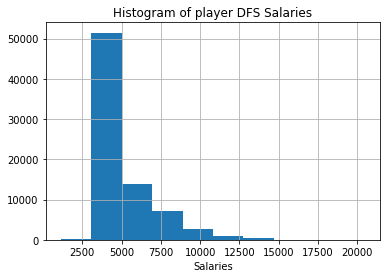

In [31]:
# plot histogram of salaries
plot = dfs[dfs.DraftKingsSalary != 0].DraftKingsSalary.hist()
plt.title('Histogram of player DFS Salaries')
plt.xlabel('Salaries')
# save plot to file
plot.get_figure().savefig('question4p2')

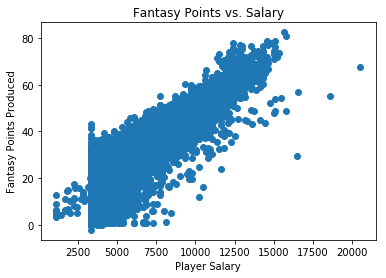

In [34]:
##question 5
# create scatterplot of fantasy points vs salary
new_dfs = dfs[(dfs.FantasyPointsDraftKings != 0) & (dfs.DraftKingsSalary != 0)]
plot = plt.scatter(new_dfs.DraftKingsSalary,new_dfs.FantasyPointsDraftKings)
plt.title('Fantasy Points vs. Salary')
plt.xlabel('Player Salary')
plt.ylabel('Fantasy Points Produced')
# save plot to file
plot.get_figure().savefig('question5')